Вариант 2

[2 балла] Выберите экспрессив и покажите, что это действительно экспрессив. Какой профиль Вы можете предположить для приведенного экспрессива -- U-образный, J-образный, перевернутое U или что-то другое? Какие примеры подкрепляют Ваше предположение?

[2 балла] Создайте корпус с контекстами, содержащими Ваш экспрессив, и с разметкой, например, от 1 до 5 звездочек. Разметка по экспрессивности может быть и другой, но хорошо иметь не меньше трёх уровней разметки. Ваш корпус может быть подкорпусом существующего датасета.

[2 балла] Создайте профиль экспрессива по формуле из работы Constant et al. 2009.

[1 балл] Подберите для данных регрессионную модель. Прокомментируйте.

[3 балла] Какой профиль получился -- U-образный, J-образный, перевернутое U или что-то другое? Проиллюстрируйте распределение примерами. Подтвердилась ли изначальная гипотеза? Есть ли среди корпусных данных неожиданные и интересные случаи?

Для анализа возьмем экспрессив "WTF" - аббревиатуру, в основном использующуюся в интернет-коммуникации в качестве эвфемизма его полного выражения. Экспрессив используется для выражения злости, нетерпения или удивления (без явно выраженной грубости).

В формальной семантике экспрессивам присваивают следующие характеристики (С.Potts):

- независимость: экспрессивы несут отдельное от основного смысла высказывания значение. Аббревиатуру "WTF" часто действительно можно заменить или удалить, и основное значение высказывания при этом не изменится. Например, в высказывании "WTF! Where've you been for the last 4 years?" от WTF можно легко избавиться, не потеряв основной смысл высказывания.

- незамещаемость: экспрессивы приписывают значение, утверждают что-то о ситуации. С помощью "WTF" говорящий выражает свое отношение к объекту высказывания: недовольство или удивление и т.п.

- зависимость от ракурса: значение экспрессива ориентируется на говорящего. Смысл экспрессива "WTF" мы извлекаем из конкретной точки зрения автора высказывания.

- дескриптивная неизъяснимость: говорящий не сможет выразить экспрессивное значение с помощью дескриптивных понятий. В случае с "WTF" говорящему действительно сложно передать свое эмоциальное отношение к событию с помощью, например, простых wh-terms (как в примере выше, когда предложение "Where've you been for the last 4 years?" уже не передает отношения говорящего к ситуации). Замена "WTF" возможна только с помощью таких же экспрессивных конструкций.

- мгновенность: чтобы достичь своей цели, экспрессиву достаточно быть просто высказанным. С "WTF" достаточно употребления его одним высказыванием, чтобы сразу передать отношение говорящему к ситуации.

- повторяемость: повторение экспрессива усиливает его экспрессивное содержание. Это свойство мы наблюдаем и с "WTF": встретив его многократное употребление, мы воспринимаем это как увеличение степени эмоции или чувства говорящего.  

Можно предположить, что для данного экспрессива будет характерен U-образный профиль, т.к. нельзя однозначно сказать, что он передает только отрицательное отношение говорящего к объекту высказывания (злость или недовольство, как, например, в предложении: "WTF is wrong with me?"). С помощью выражения "WTF" может передаваться, например, удивление: "The Golden Globes TV nominations reliably elicit a WTF reaction". В контекстах с низкой эмоциональной окраской (в отзывах с оценками 2-4) экспрессив должен употребляться реже.

Соберем корпус с контекстами экспрессива. Корпус будет создан на основе корпуса Amazon reviews (раздел Mobile_Apps), содержащий оценки от 1 до 5.

In [1]:
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
# Загружаем скачанный заранее корпус

amazon_reviews = pd.read_csv(
    'amazon_reviews_us_Mobile_Apps_v1_00.tsv', 
    sep='\t', 
    encoding='utf-8', 
    error_bad_lines=False,
    na_filter=False
)

b'Skipping line 110774: expected 15 fields, saw 22\n'
b'Skipping line 1973406: expected 15 fields, saw 22\nSkipping line 2025322: expected 15 fields, saw 22\n'


In [3]:
# Посмотрим на несколько строк корпуса

pd.set_option('display.max_colwidth', None)
amazon_reviews.head(3)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,1774101,R3PMQXEVYR4ZT1,B00DVKOYBM,263046246,8 Ball Pool,Mobile_Apps,3,0,0,N,Y,Fun,It is a fun game but sometimes hard to control the cue. Like setting up a shot and the cue moves.,2015-08-31
1,US,13679234,R1I1K3EO98EMUV,B00R1IA4RS,128868854,Christmas Cookie - Fun Match 3,Mobile_Apps,5,0,0,N,Y,Five Stars,Fun cute game. Similar to other match 3 games<br />Love the Christmas music and theme. Definitely recommend,2015-08-31
2,US,15056632,R3K23URSI2MY42,B01069LGHK,955481764,"Relax Melodies Premium: A White Noise Ambience For Sleep, Meditation & Yoga",Mobile_Apps,5,4,4,N,Y,Great app !,"It's a very nice app , you would pay quite a bit if you bought a machine to do this..",2015-08-31


In [4]:
# Посмотрим на объем корпуса

amazon_reviews.shape

(5008069, 15)

In [5]:
# Нас интересуют колонки с текстом отзыва и его рейтингом

amazon_reviews = amazon_reviews[['review_body', 'star_rating']]
amazon_reviews.head(3)

,review_body,star_rating
0,It is a fun game but sometimes hard to control the cue. Like setting up a shot and the cue moves.,3
1,Fun cute game. Similar to other match 3 games<br />Love the Christmas music and theme. Definitely recommend,5
2,"It's a very nice app , you would pay quite a bit if you bought a machine to do this..",5


In [6]:
# Для адекватного поиска экспрессива в корпусе необходимо, как минимум:
# - удалить знаки препинания,
# - привести слова к нижнему регистру.
# Сохраняем предобработанные отзывы в отдельную колонку, по которой будем проводить поиск

amazon_reviews = amazon_reviews.assign(
    review_preprocessed = [re.sub(r'[^\w\s]|[\d+]', ' ', text.lower()) for text in amazon_reviews['review_body']]
)

In [7]:
# Создаем функцию для автоматического сбора корпуса контекстов для выбранного экспрессива 
# Функция будет выводить информацию о количестве отзывов с разным рейтингом в полученном корпусе

def create_expressive_contexts_corpus(expressive: str, dataset=amazon_reviews):
    
    #подкорпус со всеми контекстами экспрессива из датасета
    corpus = dataset[dataset['review_preprocessed'].str.contains(str(' '+expressive+' '))]
    
    #количество отзывов для каждой оценки (словарь)
    rating_value_counts = corpus['star_rating'].value_counts().to_dict() 
    
    #информация о корпусе
    print('Total amount of examples:', corpus.shape[0], '(100.00%)')
    for rating_value in rating_value_counts:
        print('Amount of '+str(rating_value)+'-star reviews:', rating_value_counts[rating_value], '('+str(round((rating_value_counts[rating_value]/corpus.shape[0])*100, 2))+'%)')
    
    return corpus

In [8]:
# Извлекаем корпус контекстов экспрессива

expressive_contexts_corpus = create_expressive_contexts_corpus('wtf')

Total amount of examples: 1805 (100.00%)
Amount of 1-star reviews: 1013 (56.12%)
Amount of 5-star reviews: 233 (12.91%)
Amount of 2-star reviews: 212 (11.75%)
Amount of 3-star reviews: 199 (11.02%)
Amount of 4-star reviews: 148 (8.2%)


In [9]:
#Сохраняем полученный корпус (без рабочей колонки с предобработкой)

expressive_contexts_corpus_to_tsv = expressive_contexts_corpus[['review_body', 'star_rating']]
expressive_contexts_corpus_to_tsv.to_csv('expressive_contexts_corpus.tsv', sep='\t', encoding='utf-8')

Создадим профиль экспрессива по формуле из статьи Constant et al. 2009:

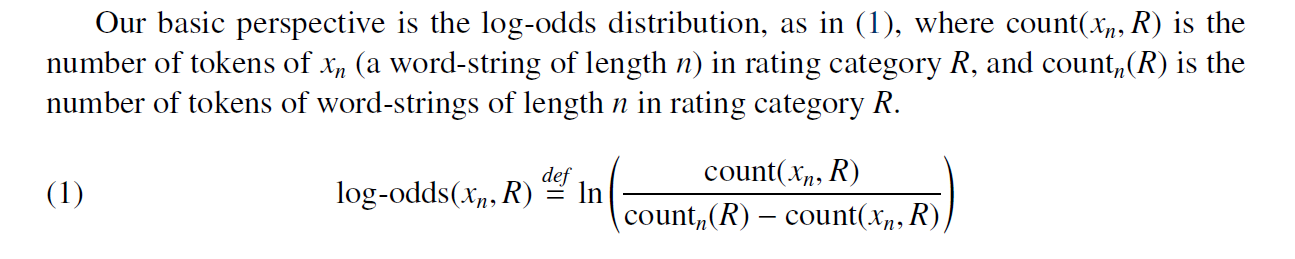

In [10]:
# Создаем функцию для подсчета log-odds (и frequencies - для сравнения) каждой категории отзывов

def count_logodds_and_freqs(expressive: str, corpus=expressive_contexts_corpus):
    
    #разобьем копус на токены, добавим их в отдельную колонку (для поиска)
    corpus = corpus.assign(
        review_tokenized = [review.split() for review in corpus['review_preprocessed']]
    )
    
    #сохраняем все log-odds и freqs для каждой категории в словарь
    params_dict = {}
  
    print('For expressive \''+expressive+'\' log-odds and frequencies are:')
    
    #считаем значения log-odds и freqs для каждой категории отзывов
    for rating_value in range(1, 6):
        
        #создаем подкорпус категории (R)
        star_corpus = corpus[corpus['star_rating'] == rating_value]
        
        #считаем count(x-n, R) и count-n(R) для данной категории
        count_xn_R = 0
        count_n_R = 0
        for review in star_corpus['review_tokenized']:
            count_xn_R += review.count(expressive)
            for token in review:
                if len(token) == len(expressive):
                    count_n_R += 1
        
        #считаем log-odds
        log_odds = round(math.log(count_xn_R/(count_n_R-count_xn_R)), 3)
        
        #считаем frequencies
        count_R = sum([len(review) for review in star_corpus['review_tokenized']])
        freqs = round(count_xn_R/count_R, 3)
        
        #сохраняем параметры
        params_dict[rating_value] = (log_odds, freqs)
        
        print('in category \''+str(rating_value)+'-star reviews\':', 
              'log-odds =', str(log_odds)+', frequencies =', freqs)
        
    return params_dict

In [11]:
#Вычисляем log-odds и frequencies

log_odds_and_freqs = count_logodds_and_freqs('wtf')

For expressive 'wtf' log-odds and frequencies are:
in category '1-star reviews': log-odds = -2.388, frequencies = 0.019
in category '2-star reviews': log-odds = -2.614, frequencies = 0.015
in category '3-star reviews': log-odds = -2.673, frequencies = 0.015
in category '4-star reviews': log-odds = -2.587, frequencies = 0.016
in category '5-star reviews': log-odds = -2.551, frequencies = 0.017


In [12]:
# Строим профиль экспрессива

def build_expressive_profile(expressive: str, params=log_odds_and_freqs):
    
    params_df = pd.DataFrame.from_dict(params, 'index', columns=['log-odds', 'freqs'])
    params_df = params_df.assign(rating=range(1, 6))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    x = params_df['rating']
    y1 = params_df['log-odds']
    y2 = params_df['freqs']
    
    #log-odds plot
    ax1.plot(x, y1, 'ko', markersize=3)
    ax1.set_xticks(range(1, 6, 1))
    ax1.title.set_text('\''+expressive+'\' in Amazon reviews (Mobile Apps)')
    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Log-odds')
    
    #frequncies plot
    ax2.plot(x, y2, 'ko', markersize=3)
    ax2.set_xticks(range(1, 6, 1))
    ax2.title.set_text('\''+expressive+'\' in Amazon reviews (Mobile Apps)')
    ax2.set_xlabel('Rating')
    ax2.set_ylabel('Frequencies')

    plt.subplots_adjust(left=0.5, right=1.4)
    plt.show()

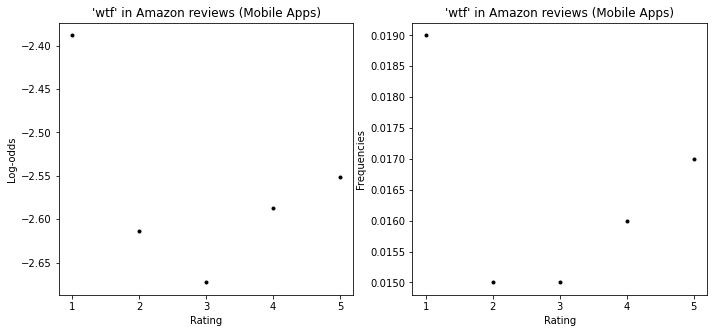

In [13]:
#Выводим профили

build_expressive_profile('wtf')

Мы видим, что, как и описывается в статье, распределение профиля по log-odds примерно соответствует распределению по частотности.

In [14]:
# Создаем функцию для построения регрессионной модели 
# С параметром 1 - линейная регрессия, 2 - квадратичная регрессия

def build_regression(expressive: str, polynomial: int, params=log_odds_and_freqs):
    
    params_df = pd.DataFrame.from_dict(params, 'index', columns=['log-odds', 'freqs'])
    params_df = params_df.assign(scale=range(-2, 3))
    
    x = params_df['scale']
    y = params_df['log-odds']
    
    #log-odds plot
    plt.plot(x, y, 'ko', markersize=3)
    plt.xticks(range(-2, 3, 1))
    
    #fitting model
    model = np.polyfit(x, y, polynomial)
    predict = np.poly1d(model)
    x_reg = range(-2, 3, 1)
    y_reg = predict(x_reg)
    
    #smoothing
    x_new = np.linspace(-2, 2, 200)
    a_BSpline = make_interp_spline(x_reg, y_reg)
    y_new = a_BSpline(x_new)
    plt.plot(x_new, y_new, linewidth=0.6)
    
    #titles
    plt.xlabel('Rating (centered around 0)')
    plt.ylabel('Log-odds')
    plt.title('\''+expressive+'\' in Amazon reviews (Mobile Apps)')
   
    plt.show()
    
    print(model)

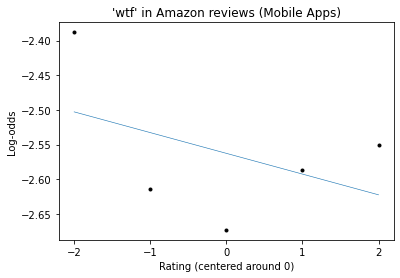

[-0.0299 -2.5626]


In [15]:
#Строим линейную регрессию

build_regression('wtf', 1)

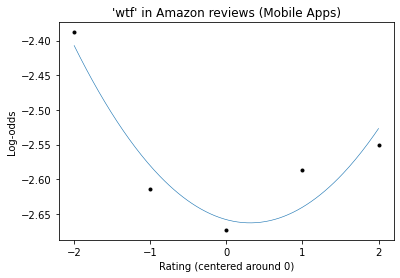

[ 0.04778571 -0.0299     -2.65817143]


In [16]:
#Строим квадратичную регрессию

build_regression('wtf', 2)

По графику видно, что квадратичная регрессия лучше отражает распределение по log-odds. Модель иллюстрирует визуально J-образный профиль (что опровергает изначальную гипотезу): видно, что левый конец графика вытянут сильнее (на отрицательную сторону эмоциональной "шкалы"), что означает, что экспрессив больше характерен для отрицательных контекстов. Исходя из положений статьи Potts, Schwarz (2008), здесь можно говорить о профиле reverse-J, т.к. коэффициент линейной регрессии отрицательный.

Несколько примеров контекстов с отрицательным эмоциональным значением:

"not supported on samsung tablets? WTF?!"

"Broke will not work on Samsung Galaxy Note. Tried Google play and Amazon apps, Google says it's already downloaded (it's not) and Amazon says it's incompatible... Seriously, WTF?"

"Code to unlock doesn't work. Second one they send doesn't either. Not enough digits. WTF?"

Примеры контекстов с положительным эмоциональным значением (видно, что почти всегда в них выражается удивление):

"but this is fantastic. If you're a fan of comedy, you MUST listen to WTF. The podcast is funny, touching, inspiring, and provocative. WTF are you waiting for?"

"I looked up, it was 12:45. After what felt like 15 minutes, it was 3AM. WTF? This game is might addicting, and right now I'm on level 100."

"This is great! I tried it on my friends and they were like wtf. It's really funny just don't take it too serious. Hilarious app"

Среди положительных контекстов встретились значения с отрицательным смыслом (включающим другие экспрессивы, как "stupid" и "shit"):
"I like it but I don't like how there is dating going on I mean wtf stupid people can't date on a game", "it worked great but there was an update and it wont play videos anymore wtf happened it was like it became shit all the other downloaders are shit and aren't as User friendly".